Importando biblioteca Pandas e atribuindo alias('apelido')

---



In [ ]:
import pandas as pd

Importando csv

---



In [ ]:
bitcoin = pd.read_csv('BTC-USD.csv', sep=',') #Solicitando separação por vírgula

Renomeando colunas

---


In [ ]:
bitcoin.rename(columns={'Date':'Data', 'Open':'Preço_Primeira_Transação', 'High':'Maior_Valor','Low':'Menor_Valor','Close':'Preço_Ultima_Transação','Adj Close':'Preço_Fechamento','Volume':'Numero_Bitcoins_Negociados'},inplace=True)

Quantidade de linhas e colunas

---



In [ ]:
print(f"Linhas {bitcoin.shape[0]} e Colunas {bitcoin.shape[1]}")

Linhas 2747 e Colunas 7


Verificando se não há valores nulos

---


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Data                        2747 non-null   object 
 1   Preço_Primeira_Transação    2747 non-null   float64
 2   Maior_Valor                 2747 non-null   float64
 3   Menor_Valor                 2747 non-null   float64
 4   Preço_Ultima_Transação      2747 non-null   float64
 5   Preço_Fechamento            2747 non-null   float64
 6   Numero_Bitcoins_Negociados  2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


Convertendo coluna 'Data' para tipo DateTime64

---



In [ ]:
bitcoin['Data'] = bitcoin['Data'].astype('datetime64')

Formatando números científicos, Convertendo coluna Numero_Bitcoins_Negociados para inteiro e limitando-os a 2 casas decimais e agrupando por Ano

---



In [ ]:
# Formatando para 2 casas decimais após o ponto
pd.set_option('float_format','{:.2f}'.format) 


In [ ]:
# Convertendo coluna Numero_Bitcoins_Negociados para
bitcoin['Numero_Bitcoins_Negociados'] = bitcoin['Numero_Bitcoins_Negociados'].astype('int')

In [ ]:
# Definindo o que cada coluna deve fazer e armazenando em uma variável...
bitcoin_ano = bitcoin.groupby(pd.Grouper(key='Data', freq='Y')).agg({'Preço_Primeira_Transação':'max','Maior_Valor':'max','Menor_Valor':'min','Preço_Ultima_Transação':'max','Preço_Fechamento':'max','Numero_Bitcoins_Negociados':'mean'}) #Agrupando por data 

Criando gráfico de linhas do número de negociações por Ano

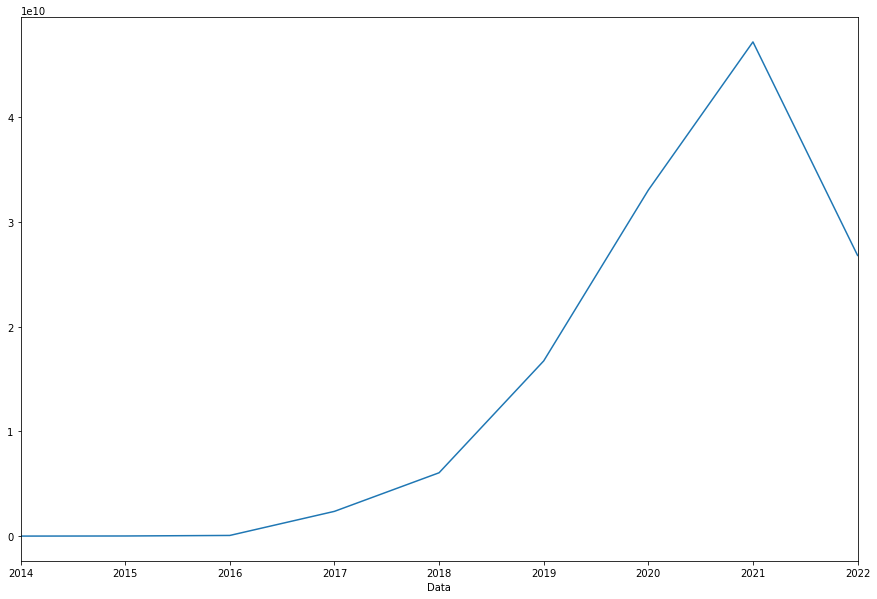

In [ ]:
bitcoin_ano['Numero_Bitcoins_Negociados'].plot(figsize=(15,10))

In [ ]:
bitcoin_mes = bitcoin.groupby(pd.Grouper(key='Data', freq='M')).agg({'Preço_Primeira_Transação':'max','Maior_Valor':'max','Menor_Valor':'min','Preço_Ultima_Transação':'max','Preço_Fechamento':'max','Numero_Bitcoins_Negociados':'mean'}) #Agrupando por data 

Ano e mês do menor número de bitcoin negociado

---

In [ ]:
bitcoin_menor_negociacao = bitcoin_mes.loc[bitcoin_mes['Numero_Bitcoins_Negociados']==bitcoin_mes['Numero_Bitcoins_Negociados'].min()]